In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df = pd.read_csv('Batsman_matches.csv')
df.head()

,avg_6,avg_4,avg_bf,avg_sr,avg_mins,runs,mins,BF,4s,6s,SR,pos,dismissal,inns,opposition,ground,date,odi_id,player
0,0.0,0.000000,0.000000,0.000000,0.0,0,-,3,0,0,0,3,caught,2,Kenya,Sharjah,02-Oct-13,ODI # 3417,Hashmatullah Shahidi
1,0.0,0.000000,3.000000,0.000000,0.0,13,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,04-Oct-13,ODI # 3418,Hashmatullah Shahidi
2,0.0,0.000000,11.000000,0.590909,0.0,38,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,01-May-14,ODI # 3487,Hashmatullah Shahidi
3,0.0,1.333333,29.666667,0.573034,0.0,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,02-May-14,ODI # 3488,Hashmatullah Shahidi
4,0.0,1.000000,24.000000,0.562500,0.0,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18-Jul-14,ODI # 3503,Hashmatullah Shahidi


In [ ]:
df.isnull().sum()

avg_6         0
avg_4         0
avg_bf        0
avg_sr        0
avg_mins      0
runs          0
mins          0
BF            0
4s            0
6s            0
SR            0
pos           0
dismissal     2
inns          0
opposition    0
ground        0
date          0
odi_id        2
player        2
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()

avg_6         0
avg_4         0
avg_bf        0
avg_sr        0
avg_mins      0
runs          0
mins          0
BF            0
4s            0
6s            0
SR            0
pos           0
dismissal     0
inns          0
opposition    0
ground        0
date          0
odi_id        0
player        0
dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df=df.replace('-',0)
df=df.replace('sub',0)
df=df.replace('NaN',0)
df=df.replace('absent',0)


le.fit(list(df['dismissal']))
df['dismissal'] = df['dismissal'].apply(lambda x: le.transform([x])[0]+1)


le.fit(list(df['opposition']))
df['opposition'] = df['opposition'].apply(lambda x: le.transform([x])[0]+1)


le.fit(list(df['ground']))
df['ground'] = df['ground'].apply(lambda x: le.transform([x])[0]+1)


le.fit(list(df['date']))
df['date'] = df['date'].apply(lambda x: le.transform([x])[0]+1)



df=df.drop(['odi_id'],axis=1)

In [ ]:
le.fit(list(df['player']))
df['player_enc'] = df['player'].apply(lambda x: le.transform([x])[0]+1)
player_encoder=df[['player','player_enc']]
# print(player_encoder)

df['player']=df['player_enc']
df=df.drop(['player_enc'],axis=1)
# df['player_enc','player']

In [ ]:
convert_dict = {'avg_6'     : float,
'avg_4'     : float,
'avg_bf'    : float,
'avg_sr'    : float,
'avg_mins'  : float,
'runs'      : float,
'mins'      : float,
'BF'        : float,
'4s'        : float,
'6s'        : float,
'SR'        : float,
'pos'       : float,
'dismissal' : float,
'inns'      : float,
'opposition': float,
'ground'    : float,
'date'      : float,
'player'    : float}

df = df.astype(convert_dict)

In [ ]:
df['SR'].value_counts()

0.00      698
100.00    395
50.00     250
66.66     162
33.33     134
         ... 
141.07      1
123.63      1
63.95       1
77.08       1
59.67       1
Name: SR, Length: 1775, dtype: int64

In [ ]:
df.head()

,avg_6,avg_4,avg_bf,avg_sr,avg_mins,runs,mins,BF,4s,6s,SR,pos,dismissal,inns,opposition,ground,date,player
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.0,0.0,0.0,0.00,3.0,3.0,2.0,9.0,106.0,74.0,46.0
1,0.0,0.000000,3.000000,0.000000,0.0,13.0,0.0,19.0,0.0,0.0,68.42,5.0,6.0,2.0,9.0,106.0,168.0,46.0
2,0.0,0.000000,11.000000,0.590909,0.0,38.0,0.0,67.0,4.0,0.0,56.71,4.0,6.0,2.0,6.0,74.0,28.0,46.0
3,0.0,1.333333,29.666667,0.573034,0.0,3.0,0.0,7.0,0.0,0.0,42.85,4.0,5.0,1.0,18.0,74.0,68.0,46.0
4,0.0,1.000000,24.000000,0.562500,0.0,15.0,21.0,22.0,2.0,0.0,68.18,4.0,3.0,1.0,21.0,18.0,747.0,46.0


<Axes: >

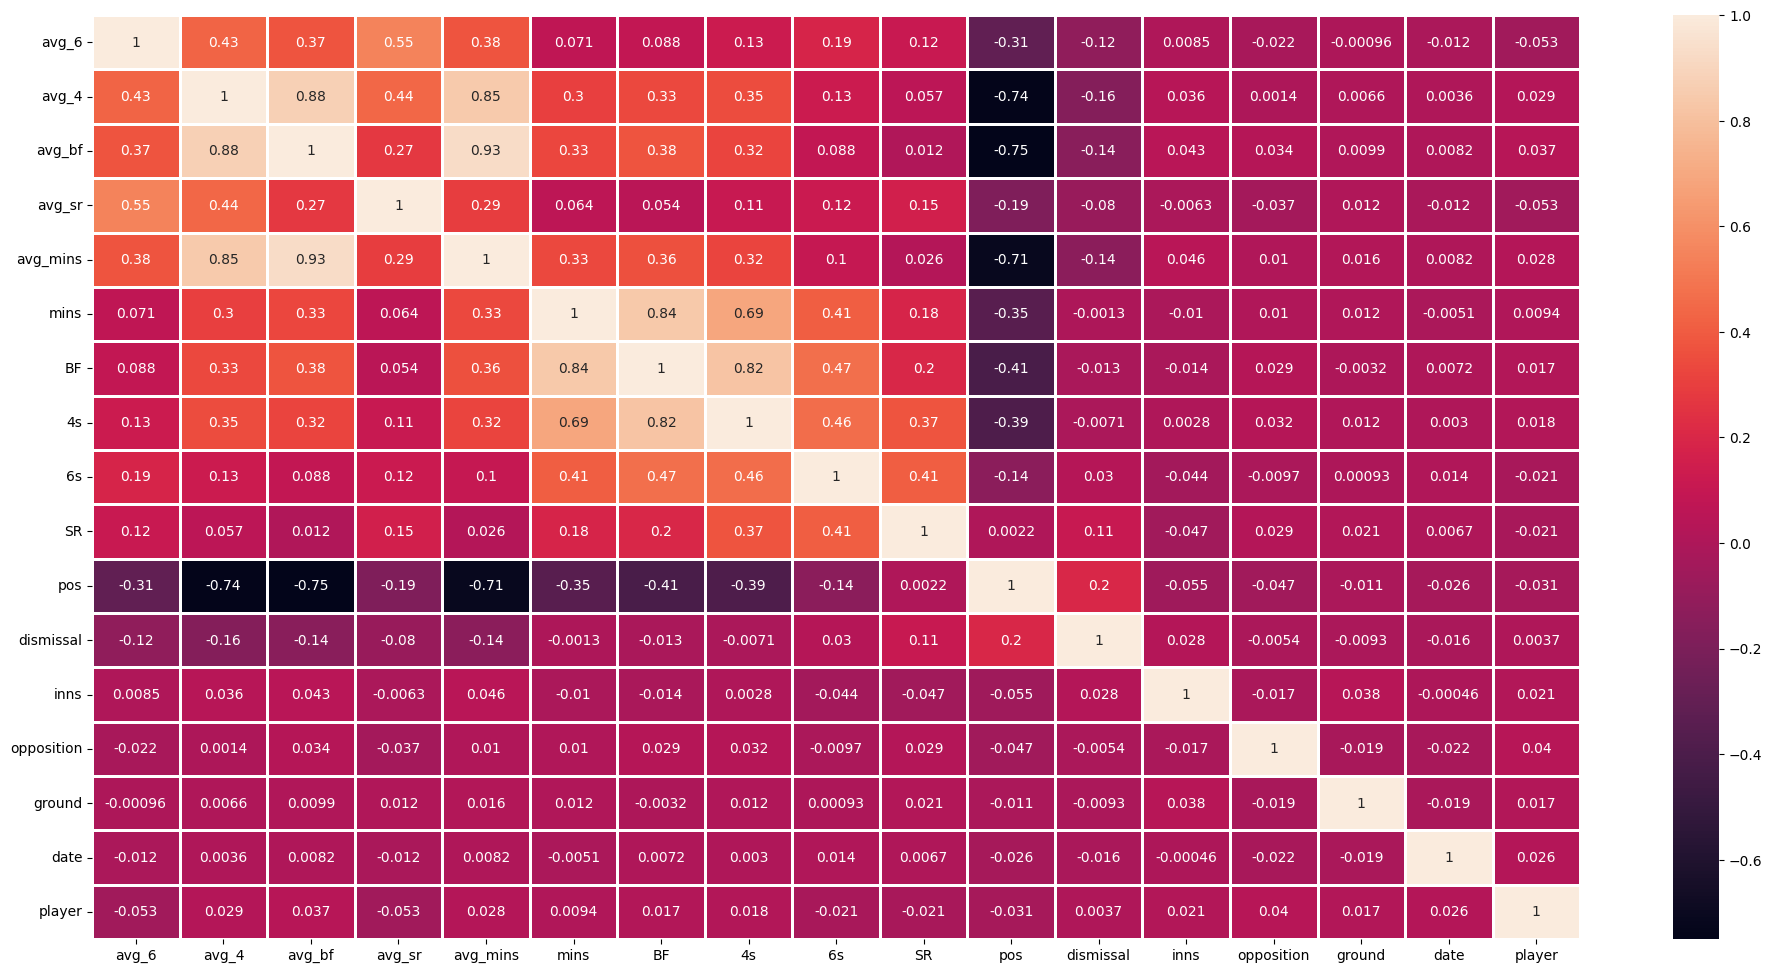

In [ ]:
new_df = df.drop(['runs'],axis=1)
plt.figure(figsize=(24,12))
sns.heatmap(data=new_df.corr(), lw = 1, annot=True)

In [ ]:
df=df.drop(['avg_mins'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['runs'],axis=1), df['runs'], test_size=0.2, random_state=0)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'Ridge': {"model": Ridge(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}}
}

def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    model_results['rScore'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)
        rScore = r2_score(y_test,y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params','rScore']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_,rScore]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return best_model

LinearRegression 4.932701448770583 {}
Ridge 4.932704403241164 {}
RandomForestRegressor 0.8544394658564952 {'max_depth': 9, 'n_estimators': 45}
Best model:  RandomForestRegressor(max_depth=9, n_estimators=45, random_state=42)


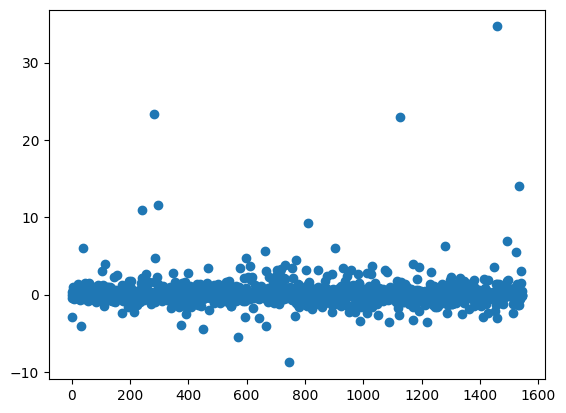

In [ ]:
trained_model= eval_models()

In [ ]:
fix = pd.read_csv('Fixtures.csv')
fix.head()

,Round_number,Team_1,Team_2,Date,Location,Group,Result
0,1,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN
